William Austin<br>
Prakash Dhimal<br>
George Mason University<br>
CS 584 Theory and Applications of Data Mining<br>
Semester project: Predicting the Impact of COVID-19

### Regression for Exponential Growth - Applied to the Corona Virus

See https://towardsdatascience.com/modeling-exponential-growth-49a2b6f22e1f

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,208,208,208,208,208,220,235,235,235,235
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,34,34,51,56,65,70,85,106,122,128
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,8,11,11,11,11,11,11,11,11,11
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,522,612,612,661,729,801,907,1118,1322,1524


In [4]:
# US data only
us_data = confirmed_df.loc[confirmed_df['Country/Region'] == 'US']
us_time_series_only = us_data.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
us_time_series_only = us_time_series_only.transpose()
us_time_series_only.columns = ['Confirmed']
us_time_series_only

,Confirmed
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
...,...
5/13/20,1390406
5/14/20,1417774
5/15/20,1442824
5/16/20,1467820


This is a running total

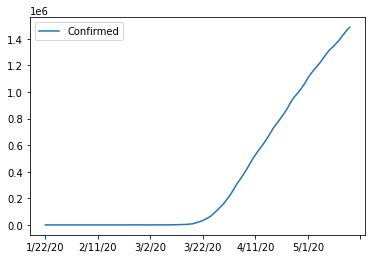

In [5]:
us_time_series_only.plot()

Daily new cases

In [6]:
us_time_series_only.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20',
       '5/14/20', '5/15/20', '5/16/20', '5/17/20'],
      dtype='object', length=117)

In [7]:
us_time_series_only.columns

Index(['Confirmed'], dtype='object')

In [8]:
us_time_series_only['logInfections'] = np.log(us_time_series_only['Confirmed'])
us_time_series_only

,Confirmed,logInfections
1/22/20,1,0.000000
1/23/20,1,0.000000
1/24/20,2,0.693147
1/25/20,2,0.693147
1/26/20,5,1.609438
...,...,...
5/13/20,1390406,14.145106
5/14/20,1417774,14.164599
5/15/20,1442824,14.182113
5/16/20,1467820,14.199289


In [9]:
us_time_series_only['Day'] = range(len(us_time_series_only))
us_time_series_only

,Confirmed,logInfections,Day
1/22/20,1,0.000000,0
1/23/20,1,0.000000,1
1/24/20,2,0.693147,2
1/25/20,2,0.693147,3
1/26/20,5,1.609438,4
...,...,...,...
5/13/20,1390406,14.145106,112
5/14/20,1417774,14.164599,113
5/15/20,1442824,14.182113,114
5/16/20,1467820,14.199289,115


In [10]:
X = us_time_series_only.Day
X = sm.add_constant(X)

In [11]:
y = us_time_series_only.logInfections

In [12]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          logInfections   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1636.
Date:                Mon, 18 May 2020   Prob (F-statistic):           7.67e-70
Time:                        17:24:29   Log-Likelihood:                -194.84
No. Observations:                 117   AIC:                             393.7
Df Residuals:                     115   BIC:                             399.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2044      0.237      0.862      0.3

#### Reading the table to make predictions 

In [13]:
a =  -0.0980
b = 0.1510

In [14]:
# log initial = 0.4480
# initial = 
np.exp(a)

0.9066489037539209

In [15]:
# log 1 + r = 0.1128
# real 1 + r = 
np.exp(b)

1.1629966580818203

In [16]:
def linear_predictions(t):
    return np.exp(a) * np.exp(b) ** t

In [17]:
us_time_series_only['Predictions'] = us_time_series_only.Day.apply(linear_predictions)
us_time_series_only.tail()

,Confirmed,logInfections,Day,Predictions
5/13/20,1390406,14.145106,112,2.005522e+07
5/14/20,1417774,14.164599,113,2.332415e+07
5/15/20,1442824,14.182113,114,2.712591e+07
5/16/20,1467820,14.199289,115,3.154735e+07
5/17/20,1486757,14.212108,116,3.668946e+07


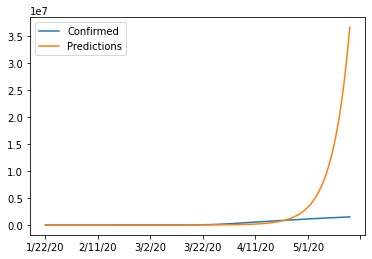

In [19]:
us_time_series_only.drop(["Day", "logInfections"], axis=1).plot()